# Expense Analyzer

- Date : 01/02/2020
- Author : Aditya Warnulkar (adwarnulkar@gmail.com)

In [4]:
# expense from finance app
expenses_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/expenses_july_2020.xls' # Expense report from Toshl finance

# budget allocation for this month
budget_file = '/Users/adwarnulkar/workspace/finance_modeling/notebooks/budget_july_2020.csv' # Budget file as per your standard of living

# 401k , HSA , ESPP contribution`
company_deductions = 1376.23 + 1376.23

# Gross - TAX - company deductions
salary = (5428-1751.46) + (5428-1765.49) - company_deductions # Take home salary (After TAX/ESPP/HSA/401K)

In [5]:
salary

4586.59

In [6]:
company_deductions

2752.46

In [7]:
import sys
import os
import re

import pandas as pd
import numpy as np

import itertools

import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook , show
output_notebook()

from src import finance_post_process as fin

Loading BokehJS ...

In [8]:
df_expense = pd.read_excel(expenses_file,skiprows=1)
df_expense.head()

,Date,Account,Category,Tags,Amount,Currency,In main currency,Main currency,Description
0,7/1/20,Cash,Grocery,NaN,2.25,USD,2.25,USD,Common for Camping
1,7/1/20,Cash,Grocery,NaN,40.78,USD,40.78,USD,Ralph’s
2,7/1/20,Cash,Bills,NaN,1.00,USD,1.00,USD,Apple iCloud Bill
3,7/2/20,Cash,Food & Drinks,NaN,15.00,USD,15.00,USD,Idyllwild Brewpub
4,7/2/20,Cash,Food & Drinks,NaN,7.81,USD,7.81,USD,Chipotle for Lunch


In [9]:
df_budget = pd.read_csv(budget_file)
df_budget.set_index('Category',inplace=True)

In [10]:
df_expense = df_expense.groupby('Category').sum()['Amount']

In [11]:
df_expense = pd.concat([df_budget,df_expense],axis=1,sort=False)
df_expense.fillna(0,inplace=True)
df_expense['leverage'] = df_expense['budget'] - df_expense['Amount']
df_expense['leverage_perc'] = 100 * df_expense['leverage'] / df_expense['budget']
df_expense = df_expense.replace([np.inf, -np.inf], np.nan)
df_expense.fillna(0,inplace=True)
df_expense

,budget,Amount,leverage,leverage_perc
Home & Utilities,1345,1349.09,-4.09,-0.304089
Office Lunch,255,44.82,210.18,82.423529
Grocery,250,239.14,10.86,4.344000
Food & Drinks,230,132.44,97.56,42.417391
Bills,150,128.99,21.01,14.006667
Car,143,128.00,15.00,10.489510
Shopping,100,133.62,-33.62,-33.620000
Fuel,130,88.00,42.00,32.307692
Gifts,50,16.35,33.65,67.300000


In [12]:
print(f"Monthly Expenditure : ${df_expense.Amount.sum():.2f}")

Monthly Expenditure : $2260.45


In [13]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $392.55


## Plotting
- https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

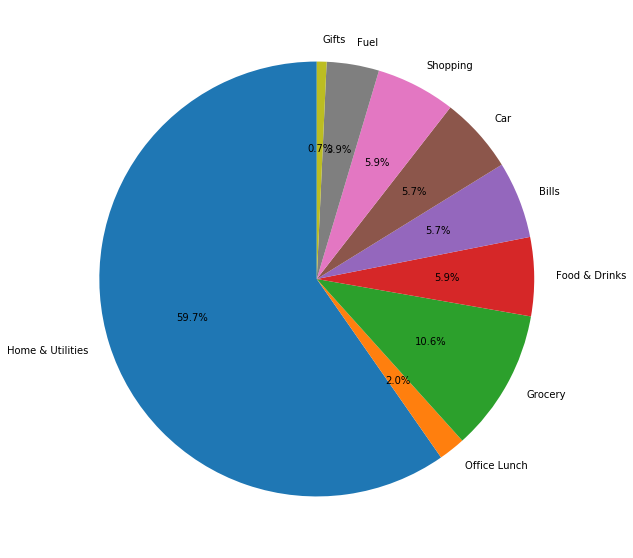

In [14]:
plt.figure(figsize=[10,10])
_ = plt.pie(df_expense.Amount,labels=df_expense.index,shadow=False, startangle=90,autopct='%1.1f%%')

In [15]:
show(fin.plot_expense(df_expense))

# Amount available for investment

In [16]:
salary_take_home = salary
salary_take_home

4586.59

In [17]:
print(f"Total Leverage : ${df_expense.leverage.sum():.2f}")

Total Leverage : $392.55


In [18]:
storage = salary_take_home - df_expense.Amount.sum()
guilt_free_money = 0.1*storage
storage = storage - guilt_free_money
invest_perc = 100*storage/salary_take_home

print(f"Amount available for guilt free expenditure : ${guilt_free_money:.2f}")
print(f"Amount available for investment : ${storage:.2f} {invest_perc:.2f}%")

Amount available for guilt free expenditure : $232.61
Amount available for investment : $2093.53 45.64%


In [19]:
df_goal = pd.read_csv("model_goal_allocation.csv",index_col='goal',usecols=['goal','model_investment'])
df_goal['asset_ratio'] = df_goal.model_investment / df_goal.model_investment.sum()
df_goal['actual_investment'] = df_goal.asset_ratio * storage
df_goal['delta'] = df_goal.actual_investment - df_goal.model_investment
df_goal

,model_investment,asset_ratio,actual_investment,delta
goal,,,,
home,1550.693801,0.507803,1063.098434,-487.595367
vacation,234.204323,0.076694,160.561839,-73.642484
wedding,377.733955,0.123696,258.960457,-118.773498
retirement,891.100000,0.291807,610.905269,-280.194731


In [20]:
df_report = pd.concat([df_expense.Amount,df_goal.actual_investment])

In [21]:
df_report = df_report.append(pd.Series([guilt_free_money],index=['Guilt Free']))

In [22]:
df_report = df_report.to_frame(name='value')
df_report['percentage'] = 100*df_report.value/df_report.value.sum()
df_report

,value,percentage
Home & Utilities,1349.090000,29.413791
Office Lunch,44.820000,0.977197
Grocery,239.140000,5.213895
Food & Drinks,132.440000,2.887548
Bills,128.990000,2.812329
Car,128.000000,2.790744
Shopping,133.620000,2.913275
Fuel,88.000000,1.918637
Gifts,16.350000,0.356474
home,1063.098434,23.178406


In [23]:
df_report.sum()

value         4586.59
percentage     100.00
dtype: float64

In [24]:
df_report.to_csv('report_july_2020.csv')